<a href="https://colab.research.google.com/github/pdh93621/Deep-learning/blob/NLP/TaggingTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
import nltk
nltk.download('treebank')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [5]:
print("품사 태깅이 된 문장 갯수 :", len(tagged_sentences))

품사 태깅이 된 문장 갯수 : 3914


In [6]:
print(tagged_sentences[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [10]:
sentences, pos_tags = [], []
for tagged_sentence in tagged_sentences:
  sentence, tag_info = zip(*tagged_sentence)
  sentences.append(list(sentence))
  pos_tags.append(list(tag_info))

In [11]:
print(sentences[0])
print(pos_tags[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.']


샘플의 최대 길이: 271
샘플의 평균 길이: 25.722024


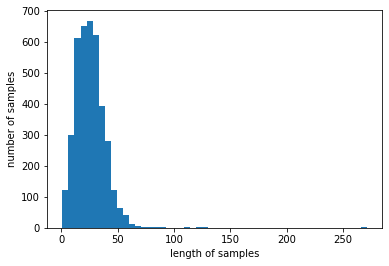

In [14]:
print('샘플의 최대 길이: %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이: %f' %(sum(map(len, sentences))/ len(sentences)))
plt.hist([len(s) for s in sentences], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [15]:
def tokenize(samples):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(samples)
  return tokenizer

In [16]:
src_tokenizer = tokenize(sentences)
tar_tokenizer = tokenize(pos_tags)

In [17]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print(f'단어 집합의 크기: {vocab_size}')
print(f'태깅 정보 집합의 크기: {tag_size}')

단어 집합의 크기: 11388
태깅 정보 집합의 크기: 47


In [18]:
x_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(pos_tags)

In [19]:
print(x_train[:2])
print(y_train[:2])

[[5601, 3746, 1, 2024, 86, 331, 1, 46, 2405, 2, 131, 27, 6, 2025, 332, 459, 2026, 3], [31, 3746, 20, 177, 4, 5602, 2915, 1, 2, 2916, 637, 147, 3]]
[[3, 3, 8, 10, 6, 7, 8, 21, 13, 4, 1, 2, 4, 7, 1, 3, 10, 9], [3, 3, 17, 1, 2, 3, 3, 8, 4, 3, 19, 1, 9]]


In [20]:
max_len = 150
x_train = pad_sequences(x_train, padding = 'post', maxlen=max_len)
y_train = pad_sequences(y_train, padding = 'post', maxlen=max_len)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = .2, random_state=777)

In [22]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes = tag_size)

In [23]:
print(f'훈련 샘플 문장의 크기: {x_train.shape}')
print(f'훈련 샘플 레이블의 크기: {y_train.shape}')
print(f'테스트 샘플 문장의 크기: {x_test.shape}')
print(f'테스트 샘플 문장의 크기: {y_test.shape}')

훈련 샘플 문장의 크기: (3131, 150)
훈련 샘플 레이블의 크기: (3131, 150, 47)
테스트 샘플 문장의 크기: (783, 150)
테스트 샘플 문장의 크기: (783, 150, 47)


In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from keras.optimizers import Adam

In [26]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length = max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation = 'softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [28]:
model.fit(x_train, y_train, batch_size = 128, epochs = 9, validation_data = (x_test, y_test))

Epoch 1/9
25/25 [==============================] - 1s 54ms/step - loss: 0.0417 - accuracy: 0.9466 - val_loss: 0.0531 - val_accuracy: 0.9206
Epoch 2/9
25/25 [==============================] - 1s 46ms/step - loss: 0.0274 - accuracy: 0.9647 - val_loss: 0.0461 - val_accuracy: 0.9271
Epoch 3/9
25/25 [==============================] - 1s 45ms/step - loss: 0.0199 - accuracy: 0.9741 - val_loss: 0.0424 - val_accuracy: 0.9317
Epoch 4/9
25/25 [==============================] - 1s 46ms/step - loss: 0.0157 - accuracy: 0.9788 - val_loss: 0.0414 - val_accuracy: 0.9319
Epoch 5/9
25/25 [==============================] - 1s 52ms/step - loss: 0.0129 - accuracy: 0.9823 - val_loss: 0.0394 - val_accuracy: 0.9338
Epoch 6/9
25/25 [==============================] - 1s 51ms/step - loss: 0.0109 - accuracy: 0.9846 - val_loss: 0.0393 - val_accuracy: 0.9330
Epoch 7/9
25/25 [==============================] - 1s 47ms/step - loss: 0.0093 - accuracy: 0.9872 - val_loss: 0.0388 - val_accuracy: 0.9344
Epoch 8/9
25/25 [===

In [29]:
print('\n 테스트 정확도: %.4f' % (model.evaluate(x_test, y_test)[1]))

25/25 [==============================] - 0s 12ms/step - loss: 0.0391 - accuracy: 0.9357

 테스트 정확도: 0.9357


In [30]:
index_to_word = src_tokenizer.index_word
index_to_tag = tar_tokenizer.index_word

i = 10 # 확인하고 싶은 인덱스
y_predicted = model.predict(np.array([x_test[i]]))
y_predicted = np.argmax(y_predicted, axis=-1) #원-핫 인코딩을 다시 정수 인코딩으로 변경
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(x_test[i], true, y_predicted[0]):
  if w != 0:
    print("{:17}: {:7} {}".format(index_to_word[w], index_to_tag[t].upper(), index_to_tag[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
in               : IN      IN
addition         : NN      NN
,                : ,       ,
buick            : NNP     NNP
is               : VBZ     VBZ
a                : DT      DT
relatively       : RB      RB
respected        : VBN     VBN
nameplate        : NN      NN
among            : IN      IN
american         : NNP     NNP
express          : NNP     NNP
card             : NN      NN
holders          : NNS     NNS
,                : ,       ,
says             : VBZ     VBZ
0                : -NONE-  -NONE-
*t*-1            : -NONE-  -NONE-
an               : DT      DT
american         : NNP     NNP
express          : NNP     NNP
spokeswoman      : NN      NN
.                : .       .


In [31]:
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

In [32]:
f = open('/content/drive/MyDrive/dataset/NLP/train.txt', 'r')
tagged_sentences = []
sentence = []

for line in f:
  if len(line) == 0 or line.startswith('-DOCSTART') or line[0] == '\n':
    if len(sentence) > 0:
      tagged_sentences.append(sentence)
      sentence = []
    continue

  splits = line.split(' ')
  splits[-1] = re.sub(r'\n', '', splits[-1])
  word = splits[0].lower()
  sentence.append([word, splits[-1]])

In [33]:
print(f'전체 샘플 갯수: {len(tagged_sentences)}')

전체 샘플 갯수: 14041


In [34]:
print(tagged_sentences[0])

[['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]


In [36]:
sentences, ner_tags = [], []
for tagged_sentence in tagged_sentences:
  sentence, tag_info = zip(*tagged_sentence)
  sentences.append(list(sentence))
  ner_tags.append(list(tag_info))

In [37]:
print(sentences[0])
print(ner_tags[0])

['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


In [38]:
print(sentences[20])
print(ner_tags[20])

['rare', 'hendrix', 'song', 'draft', 'sells', 'for', 'almost', '$', '17,000', '.']
['O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


샘플의 최대 길이: 113
샘플의 평균 길이: 14.501887


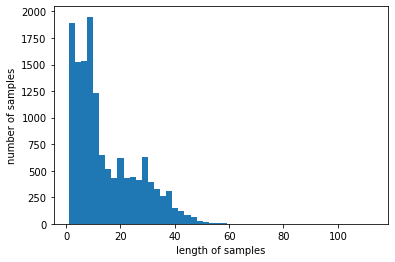

In [40]:
print('샘플의 최대 길이: %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이: %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [41]:
max_words = 4000
src_tokenizer = Tokenizer(num_words=max_words, oov_token = 'OOV')
src_tokenizer.fit_on_texts(sentences)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)

In [43]:
vocab_size = max_words
tag_size = len(tar_tokenizer.word_index) + 1
print(f'단어 집합의 크기: {vocab_size}')
print(f'개체명 태깅 정보 집합의 크기: {tag_size}')

단어 집합의 크기: 4000
개체명 태깅 정보 집합의 크기: 10


In [45]:
x_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [47]:
print(x_train[0])
print(y_train[0])

[989, 1, 205, 629, 7, 3939, 216, 1, 3]
[4, 1, 7, 1, 1, 1, 7, 1, 1]


In [51]:
index_to_word = src_tokenizer.index_word 
index_to_ner = tar_tokenizer.index_word

In [52]:
decoded = []
for index in x_train[0]:
  decoded.append(index_to_word[index])

print(f'기존 문장; {sentences[0]}')
print(f'빈도수가 낮은 단어가 OOV로 처리된 문장: {decoded}')

기존 문장; ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
빈도수가 낮은 단어가 OOV로 처리된 문장: ['eu', 'OOV', 'german', 'call', 'to', 'boycott', 'british', 'OOV', '.']


In [53]:
max_len = 70
x_train = pad_sequences(x_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = .2, random_state = 777)

In [55]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [56]:
print(f'훈련 샘플 문장의 길이: {x_train.shape}')
print(f'훈련 샘플 에이블의 길이: {y_train.shape}')
print(f'테스트 샘플 문장의 길이: {x_test.shape}')
print(f'테스트 새플 레이블의 길이: {y_test.shape}')

훈련 샘플 문장의 길이: (11232, 70)
훈련 샘플 에이블의 길이: (11232, 70, 10)
테스트 샘플 문장의 길이: (2809, 70)
테스트 새플 레이블의 길이: (2809, 70, 10)


In [57]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from keras.optimizers import Adam

In [62]:
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim=128, input_length=max_len, mask_zero = True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation = 'softmax')))

In [63]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=8, validation_data=(x_test, y_test))

Epoch 1/8
88/88 [==============================] - 13s 57ms/step - loss: 0.2606 - accuracy: 0.7884 - val_loss: 0.1336 - val_accuracy: 0.8327
Epoch 2/8
88/88 [==============================] - 2s 27ms/step - loss: 0.1167 - accuracy: 0.8389 - val_loss: 0.0786 - val_accuracy: 0.8795
Epoch 3/8
88/88 [==============================] - 2s 26ms/step - loss: 0.0738 - accuracy: 0.8928 - val_loss: 0.0555 - val_accuracy: 0.9204
Epoch 4/8
88/88 [==============================] - 2s 27ms/step - loss: 0.0520 - accuracy: 0.9264 - val_loss: 0.0425 - val_accuracy: 0.9416
Epoch 5/8
88/88 [==============================] - 2s 26ms/step - loss: 0.0394 - accuracy: 0.9443 - val_loss: 0.0358 - val_accuracy: 0.9496
Epoch 6/8
88/88 [==============================] - 2s 26ms/step - loss: 0.0303 - accuracy: 0.9569 - val_loss: 0.0331 - val_accuracy: 0.9528
Epoch 7/8
88/88 [==============================] - 2s 27ms/step - loss: 0.0262 - accuracy: 0.9626 - val_loss: 0.0315 - val_accuracy: 0.9544
Epoch 8/8
88/88 [==

In [64]:
print('테스트 정확도: %.4f' %(model.evaluate(x_test,y_test)[1]))

88/88 [==============================] - 1s 10ms/step - loss: 0.0317 - accuracy: 0.9568
테스트 정확도: 0.9568


In [71]:
i = 55
y_pred = model.predict(np.array([x_test[i]]))
y_pred = np.argmax(y_pred, axis= -1)
true = np.argmax(y_test[i], -1)

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(x_test[i], true, y_pred[0]):
  if w != 0: #PAD제외
    print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
bob              : B-PER   B-PER
dole             : I-PER   I-PER
,                : O       O
the              : O       O
republican       : B-MISC  B-MISC
presidential     : O       O
OOV              : O       O
,                : O       O
tried            : O       O
and              : O       O
failed           : O       O
to               : O       O
OOV              : O       O
a                : O       O
OOV              : O       O
OOV              : O       O
in               : O       O
his              : O       O
party            : O       O
's               : O       O
OOV              : O       O
OOV              : O       O
the              : O       O
OOV              : O       O
of               : O       O
those            : O       O
within           : O       O
the              : O       O
party            : O       O
who              : O       O
OOV              : O       O
abortion         : O      